<a href="https://colab.research.google.com/github/Collinsngenokip/basic-ml-course/blob/Week6/Desion_Tree_%26_Random_Forest_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 6: Decision tree & Random forest

Good news! We don't have to implement anything from scratch today!

To make things easier, make a copy of this notebook and do the exercise in there.

Implement everywhere that has ...

In [40]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [41]:
# Load the data
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names
print(X.shape, y.shape)

(20640, 8) (20640,)


##**Task 1 (1pt)**

Split the data into a training and validation set with 80%/20% distribution

Use train_test_split function from sklearn for this. Remember to set the random_state parameter to 0

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size= 0.2, random_state= 0)

##**Task 2 (1 pt)**

Train a decision tree model to predict house price. Remember to use the training set X_train to train the model

Train a model with max_depth=1. Remember to set the random_state=0
Visualize the tree you just trained. You can refer to the code from the lecture video.

Which feature was used to split the data (choose 1 and write you answer in a comment below the code
*   
MedInc
*  
AveRooms
*  
AveB
*
HouseAge





In [43]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
# for visualization
import graphviz

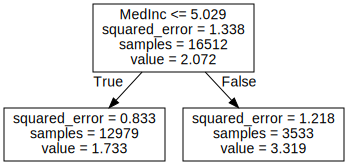

In [44]:
# Initialize the decision tree class and train the decision tree
tree = DecisionTreeRegressor(max_depth=1, random_state=0)
tree.fit(X_train,y_train)
# Visualize the tree
graphviz.Source(export_graphviz(tree,   
                                       feature_names = data["feature_names"], 
                                       class_names = data["target_names"]))

# Write you answer here: MedInc

##**Task 3 (2pt)**
*   
Train a decision tree with max_depth=3.
*
Don't forget random_state=0
*   
Print the mean square error on the validation set.
*   
What is the mean square error you just calculate.

Write you answer in the comment below the code.

In [45]:
from sklearn.metrics import mean_squared_error
# Train the model
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(X_train,y_train)
prediction = tree.predict(X_valid)

# Print the mean squared error
mse = mean_squared_error(y_valid,prediction)

# What's the mean squared error you just calculate:
print("mean square error:",mse)

mean square error: 0.6533119456700849


##**Task 4 (2pt)**
Tune the max_depth parameter of the model
*  
Try different values for max_depth: [5, 6, 7, 8, 9, 10, 11, 12]
*  
Don't forget random_state=0
*  
Print out the mean square error for each value of max_depth
*  
What is the best value for max_depth? Write you answer in the comment below the code.

In [46]:
# Your code here
highest_mse = 0
for max_d in range(5,13):
    tree = tree = DecisionTreeRegressor(random_state=0, max_depth=max_d)
    tree.fit(X_train,y_train)
    prediction = tree.predict(X_valid)
# What's the best max_depth:
    mse = mean_squared_error(y_valid,prediction)
    print('Max_depth %s'%(max_d), "  is " ,mse)
    if max_depth < max_d:
       max_depth = max_d
print("Best max_depth :",max_depth,"which is",mse)

Max_depth 5   is  0.5401962207714344
Max_depth 6   is  0.4984109265539033
Max_depth 7   is  0.4596987909870867
Max_depth 8   is  0.44604575226916726
Max_depth 9   is  0.4313636207268005
Max_depth 10   is  0.4470239650247865
Max_depth 11   is  0.444291361570811
Max_depth 12   is  0.45049079652055624
Best max_depth : 12 which is 0.45049079652055624


##**Task 5 (1pt)**
Let's switch to random forest

Train a random forest model with
*  
n_estimators=20
*  
random_state=0

What is the mean square error on the validation set? Write you answer in the comment below the code

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Your code here
model =RandomForestRegressor(n_estimators=20,random_state=0)
model.fit(X_train,y_train)
prediction = model.predict(X_valid)

#The mean square error on the validation set
mse = mean_squared_error(y_valid,prediction)
print("mean square error on the validation set =",mse)

mean square error on the validation set = 0.26946775214546204


##**Task 6 (2pt)**

Tune different hyperparameter of random forest
*   
random_state=0
*   
Try different values for max_features: [0.5, 'sqrt', 'log2']
*   
For each of these values for max_features, try different values of n_estimators from 10 to 100 (with step size 10): i.e [10, 20, 30, ...]
*   
Optionally set n_jobs=-1 to train faster

In [54]:
from sklearn.model_selection import RandomizedSearchCV
# Your code here 
parameters={"max_depth" : [1,3,5,7,9,11,12],
            "n_estimators":[10,20,30,40,50,60,70,80,90,100],
            "max_features":[0.5,"sqrt",'log2']
            }
 
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,random_state=0, n_jobs = -1,cv= 5, verbose = 2, param_distributions = parameters)
rf_random.fit(X_train, y_train) 
print("Best parameters are:",rf_random.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters are: {'n_estimators': 90, 'max_features': 0.5, 'max_depth': 12}


##**Task 7 (1pt)**
Extract feature importance of the model Train a random forest model with:
*   
n_estimators=10
*   
max_dept=15
*   
random_state=0

Get the feature importance attribute of the model. You can use the feature_importances_ attibute

What is the most important feature? write your answer in a comment in the code cell below.

In [50]:
# Train your model
forest = RandomForestRegressor(n_estimators = 10 ,max_depth = 15, random_state = 0)
forest.fit(X_train, y_train)

# Get feature importance
feature_importances = forest.feature_importances_

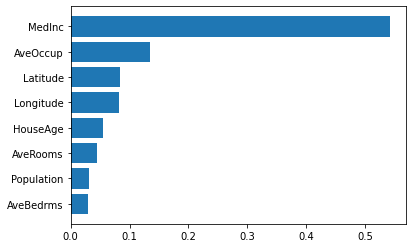

In [51]:
df_importances = pd.DataFrame()
df_importances['feature'] = feature_names
df_importances['importance'] = feature_importances
df_importances.sort_values(by='importance', inplace=True)

plt.barh(range(df_importances.shape[0]), df_importances.importance)
plt.yticks(range(df_importances.shape[0]), df_importances.feature)

plt.show()

#The most important feature: MedInc 